<a href="https://colab.research.google.com/github/polugariteja/2311cs020531/blob/main/Multi_Linear_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing file(CSV)
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print(df.head(15))


Saving Cars.csv to Cars.csv
    HP        MPG  VOL          SP         WT
0   49  53.700681   89  104.185353  28.762059
1   55  50.013401   92  105.461264  30.466833
2   55  50.013401   92  105.461264  30.193597
3   70  45.696322   92  113.461264  30.632114
4   53  50.504232   92  104.461264  29.889149
5   70  45.696322   89  113.185353  29.591768
6   55  50.013401   92  105.461264  30.308480
7   62  46.716554   50  102.598513  15.847758
8   62  46.716554   50  102.598513  16.359484
9   80  42.299078   94  115.645204  30.920154
10  73  44.652834   89  111.185353  29.363341
11  92  39.354094   50  117.598513  15.753535
12  92  39.354094   99  122.105055  32.813592
13  73  44.652834   89  111.185353  29.378436
14  66  45.734893   89  108.185353  29.347279


In [3]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+SP+HP', data=df).fit()

In [5]:
#Cofficient
model.params

,0
Intercept,28.784808
WT,-0.599413
SP,0.407753
HP,-0.208502


In [6]:
print(model.tvalues, '\n', model.pvalues)

Intercept    1.986465
WT          -8.894562
SP           2.609482
HP          -5.386453
dtype: float64 
 Intercept    5.053995e-02
WT           1.914892e-13
SP           1.089096e-02
HP           7.560276e-07
dtype: float64


In [7]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [8]:
#R squared values
(model.rsquared,model.rsquared_adj)


(0.7694828139983458, 0.7605016249333464)

In [9]:
ml_v=smf.ols('MPG~VOL',data=df).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [10]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.27990086511227075, 0.27078568618964116)

In [11]:
ml_w=smf.ols('MPG~WT+SP+HP',data=df).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [12]:
(ml_w.rsquared,ml_w.rsquared_adj)

(0.7694828139983458, 0.7605016249333464)

In [13]:
ml_wv=smf.ols('MPG~WT+VOL',data=df).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [14]:
(ml_wv.rsquared,ml_wv.rsquared_adj)

(0.2821095616445982, 0.2637021145072803)

In [15]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)

In [16]:
rsq_wt = smf.ols('WT~HP+VOL+SP',data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)

In [17]:
rsq_wt = smf.ols('VOL~WT+HP+SP',data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)

In [18]:
rsq_vol = smf.ols('SP~WT+VOL+HP',data=df).fit().rsquared
vif_vol = 1/(1-rsq_vol)

In [19]:
rsq_sp = smf.ols('SP~WT+VOL+HP',data=df).fit().rsquared
vif_sp = 1/(1-rsq_sp)

In [20]:
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,638.806084
2,VOL,20.007639
3,SP,20.007639


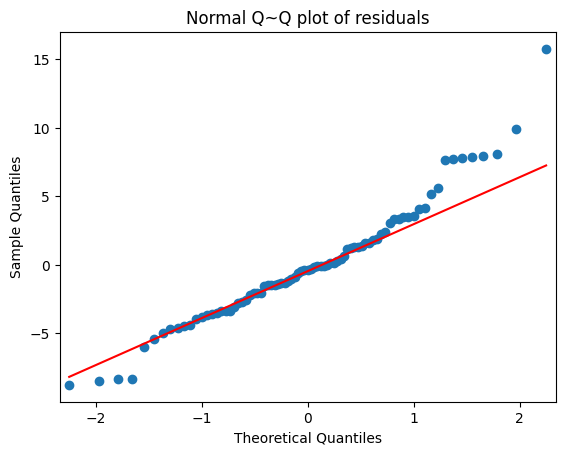

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q~Q plot of residuals")
plt.show()

In [23]:
import numpy as np # Import the numpy library and assign it the alias 'np'

list(np.where(model.resid > 10)) # Now you can use 'np' to access numpy functions

[array([76])]

In [24]:
def get_standarized_values( vals ):
    return (vals - vals.mean())/vals.std()

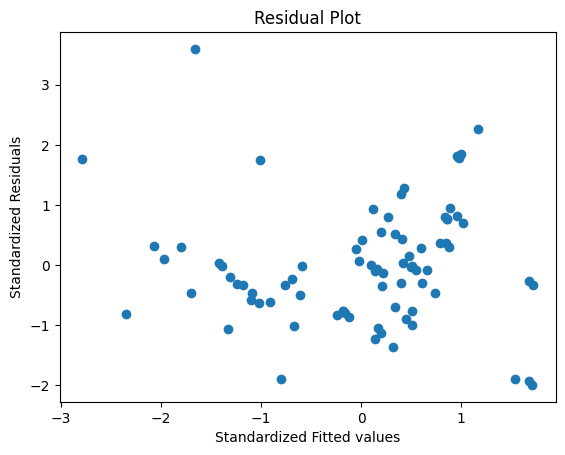

In [25]:
plt.scatter(get_standarized_values(model.fittedvalues),
            get_standarized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residuals')
plt.show()

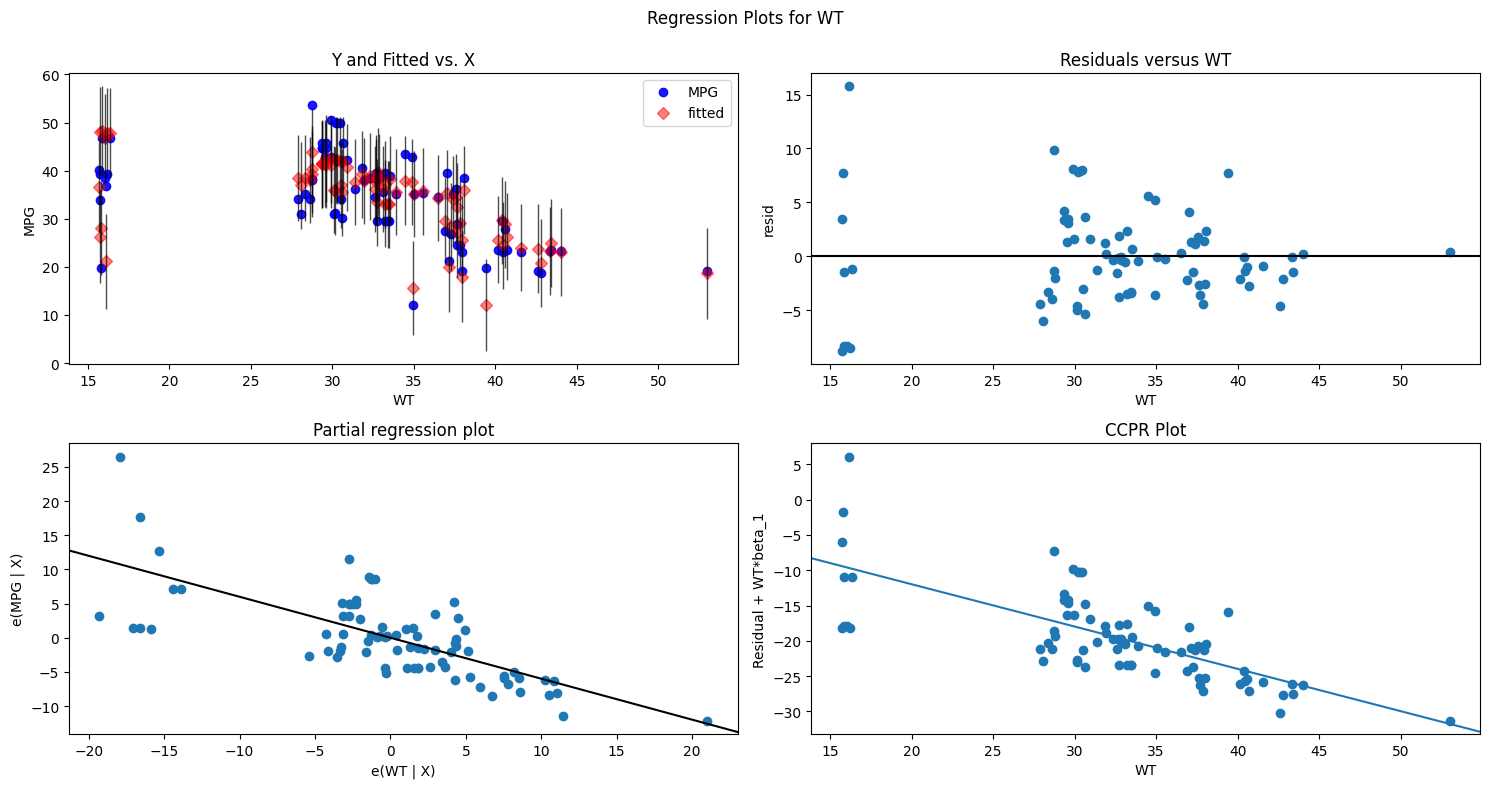

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

In [32]:
#COOK'S DISTANCE
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

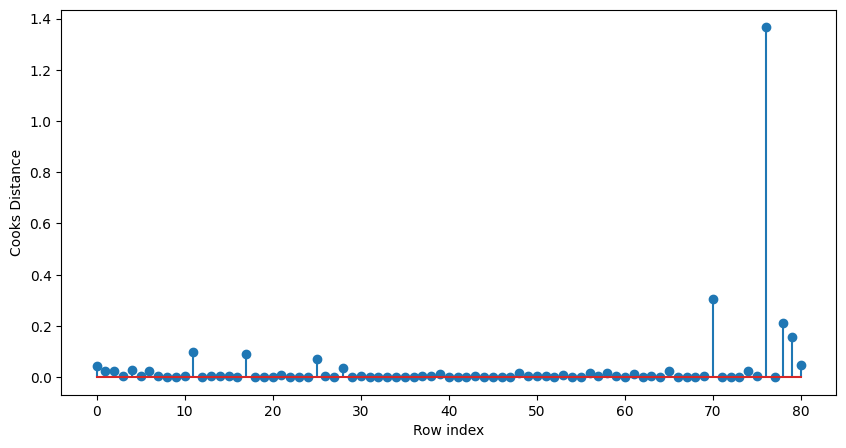

In [31]:
fig = plt.subplots(figsize=(10, 5))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

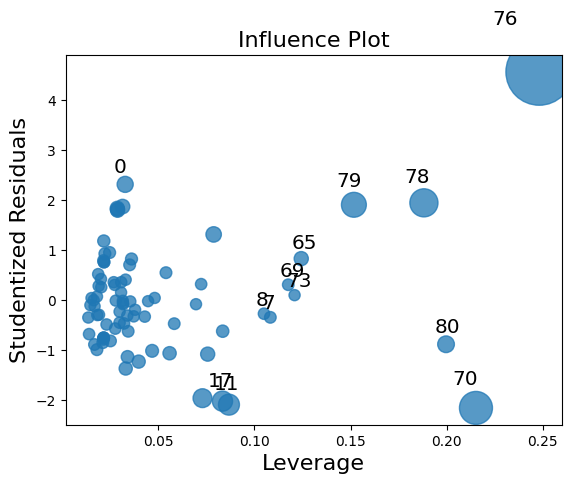

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model,figsize=(15,8))
plt.show()

In [33]:
df[df.index.isin([60,67])]

,HP,MPG,VOL,SP,WT
60,145,27.354265,111,130.208698,36.888153
67,165,23.103172,127,133.680223,41.573975


In [40]:
df_new = df.copy()
df=df_new.drop(df_new.index[[60,67]],axis=0).reset_index()

In [41]:
df=df.drop(['index'],axis=1)

In [42]:
df

,HP,MPG,VOL,SP
0,49,53.700681,89,104.185353
1,55,50.013401,92,105.461264
2,55,50.013401,92,105.461264
3,70,45.696322,92,113.461264
4,53,50.504232,92,104.461264
...,...,...,...,...
74,322,36.900000,50,169.598513
75,238,19.197888,115,150.576579
76,263,34.000000,50,151.598513
77,295,19.833733,119,167.944460
